In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [59]:
merged_df = pd.read_csv('../data/processed/v1_merged_weather_data.csv')

In [60]:
merged_df.head()

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,name,datetime,tempmax,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,0,11/09/2024,24,6,16,5,,utrecht,11/09/2024,14.5,...,17.3,7,10.0,2024-09-11T07:08:06,2024-09-11T20:02:59,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,remote
1,1,10/09/2024,26,16,27,3,,utrecht,10/09/2024,16.6,...,6.8,5,10.0,2024-09-10T07:06:28,2024-09-10T20:05:19,0.24,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,remote
2,2,09/09/2024,15,14,25,3,,utrecht,09/09/2024,20.2,...,16.0,6,10.0,2024-09-09T07:04:50,2024-09-09T20:07:39,0.21,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,remote
3,3,08/09/2024,17,12,31,9,,utrecht,08/09/2024,21.9,...,17.7,7,10.0,2024-09-08T07:03:12,2024-09-08T20:09:58,0.18,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"06260099999,remote"
4,4,07/09/2024,25,13,34,3,,utrecht,07/09/2024,26.4,...,16.5,6,10.0,2024-09-07T07:01:34,2024-09-07T20:12:18,0.14,Overcast,Cloudy skies throughout the day.,cloudy,06260099999


In [4]:
merged_df.describe()

,Unnamed: 0,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,...,3670.000000,3670.000000,3670.000000,3670.000000,3653.000000,3670.000000,3670.000000,3670.000000,976.000000,3670.000000
mean,1834.500000,15.217602,7.310300,11.349837,14.635559,5.746185,10.273678,7.555313,79.676267,2.301063,...,20.585422,189.735014,1015.367738,72.935150,22.953052,148.234387,12.793624,4.909264,10.471311,0.482362
std,1059.582072,6.998231,5.634999,6.058699,7.779977,6.910861,7.186392,5.347161,10.200539,4.659164,...,7.585265,90.537940,9.902457,26.586774,10.032893,100.519043,8.686294,2.595717,4.092920,0.289026
min,0.000000,-4.800000,-15.100000,-8.300000,-10.700000,-24.000000,-16.000000,-13.500000,36.400000,0.000000,...,7.200000,0.100000,975.600000,0.000000,0.100000,1.100000,0.000000,0.000000,10.000000,0.000000
25%,917.250000,9.900000,3.200000,6.800000,8.200000,0.425000,4.600000,3.600000,73.200000,0.000000,...,14.400000,128.100000,1009.425000,57.800000,15.400000,51.500000,4.400000,3.000000,10.000000,0.250000
50%,1834.500000,14.900000,7.400000,11.100000,14.900000,5.700000,10.700000,7.700000,81.000000,0.100000,...,18.400000,206.400000,1016.050000,80.850000,23.000000,138.450000,12.000000,5.000000,10.000000,0.480000
75%,2751.750000,20.700000,11.700000,16.200000,20.700000,11.700000,16.200000,11.800000,87.400000,2.400000,...,25.200000,249.600000,1022.000000,95.000000,30.400000,232.275000,20.075000,7.000000,10.000000,0.750000
max,3669.000000,37.200000,23.700000,29.600000,39.600000,23.700000,29.700000,20.000000,99.800000,48.900000,...,64.800000,359.800000,1046.900000,100.000000,46.000000,360.000000,30.900000,9.000000,75.000000,0.980000


In [5]:
print(merged_df.columns)
print(len(merged_df.columns))

Index(['Unnamed: 0', 'date', ' pm25', ' pm10', ' o3', ' no2', ' so2', 'name',
       'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')
40


In [6]:
cols_to_drop = ["Unnamed: 0", 'name', 'datetime', 'sunrise', 'sunset', 'preciptype', 'conditions', 'description', 'icon', 'stations']
merged_df.drop(cols_to_drop, axis=1, inplace=True)

In [7]:
merged_df = merged_df.rename(columns={" pm25": "pm25", " pm10": "pm10", " o3": "o3", " no2": "no2", " so2": "so2"})

In [8]:
merged_df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,...,3670.000000,3670.000000,3670.000000,3670.000000,3653.000000,3670.000000,3670.000000,3670.000000,976.000000,3670.000000
mean,15.217602,7.310300,11.349837,14.635559,5.746185,10.273678,7.555313,79.676267,2.301063,51.389646,...,20.585422,189.735014,1015.367738,72.935150,22.953052,148.234387,12.793624,4.909264,10.471311,0.482362
std,6.998231,5.634999,6.058699,7.779977,6.910861,7.186392,5.347161,10.200539,4.659164,49.987496,...,7.585265,90.537940,9.902457,26.586774,10.032893,100.519043,8.686294,2.595717,4.092920,0.289026
min,-4.800000,-15.100000,-8.300000,-10.700000,-24.000000,-16.000000,-13.500000,36.400000,0.000000,0.000000,...,7.200000,0.100000,975.600000,0.000000,0.100000,1.100000,0.000000,0.000000,10.000000,0.000000
25%,9.900000,3.200000,6.800000,8.200000,0.425000,4.600000,3.600000,73.200000,0.000000,0.000000,...,14.400000,128.100000,1009.425000,57.800000,15.400000,51.500000,4.400000,3.000000,10.000000,0.250000
50%,14.900000,7.400000,11.100000,14.900000,5.700000,10.700000,7.700000,81.000000,0.100000,100.000000,...,18.400000,206.400000,1016.050000,80.850000,23.000000,138.450000,12.000000,5.000000,10.000000,0.480000
75%,20.700000,11.700000,16.200000,20.700000,11.700000,16.200000,11.800000,87.400000,2.400000,100.000000,...,25.200000,249.600000,1022.000000,95.000000,30.400000,232.275000,20.075000,7.000000,10.000000,0.750000
max,37.200000,23.700000,29.600000,39.600000,23.700000,29.700000,20.000000,99.800000,48.900000,100.000000,...,64.800000,359.800000,1046.900000,100.000000,46.000000,360.000000,30.900000,9.000000,75.000000,0.980000


In [9]:
100 * merged_df.isnull().sum()/len(merged_df) 

date                 0.000000
pm25                 0.000000
pm10                 0.000000
o3                   0.000000
no2                  0.000000
so2                  0.000000
tempmax              0.000000
tempmin              0.000000
temp                 0.000000
feelslikemax         0.000000
feelslikemin         0.000000
feelslike            0.000000
dew                  0.000000
humidity             0.000000
precip               0.000000
precipprob           0.000000
precipcover          0.000000
snow                 0.000000
snowdepth            0.000000
windgust             0.000000
windspeed            0.000000
winddir              0.000000
sealevelpressure     0.000000
cloudcover           0.000000
visibility           0.463215
solarradiation       0.000000
solarenergy          0.000000
uvindex              0.000000
severerisk          73.405995
moonphase            0.000000
dtype: float64

In [10]:
merged_df.loc[:, merged_df.columns != 'date'] = merged_df.loc[:, merged_df.columns != 'date'].apply(pd.to_numeric, errors='coerce')

In [11]:
merged_df.loc[:, merged_df.columns != 'date']

,pm25,pm10,o3,no2,so2,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
0,24.0,6.0,16.0,5.0,NaN,14.5,9.2,11.8,14.5,7.8,...,23.0,265.1,1005.1,83.8,14.7,203.2,17.3,7,10.0,0.25
1,26.0,16.0,27.0,3.0,NaN,16.6,12.4,14.7,16.6,12.4,...,28.4,227.0,1007.8,95.0,20.4,78.8,6.8,5,10.0,0.24
2,15.0,14.0,25.0,3.0,NaN,20.2,14.0,16.4,20.2,14.0,...,22.3,308.3,1004.8,87.9,21.5,186.1,16.0,6,10.0,0.21
3,17.0,12.0,31.0,9.0,NaN,21.9,14.9,19.5,21.9,14.9,...,22.3,179.0,1007.8,83.7,37.4,203.7,17.7,7,10.0,0.18
4,25.0,13.0,34.0,3.0,NaN,26.4,17.6,21.0,26.4,17.6,...,14.8,129.0,1011.2,90.3,23.3,191.1,16.5,6,10.0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,NaN,17.0,11.0,17.0,1.0,7.7,3.2,5.3,5.1,-0.7,...,21.6,192.4,1009.2,27.9,23.3,72.1,6.1,3,NaN,0.08
3666,NaN,22.0,18.0,8.0,NaN,8.4,5.4,6.6,5.3,1.3,...,28.8,185.8,996.0,83.8,24.4,16.2,1.4,1,NaN,0.05
3667,NaN,48.0,22.0,6.0,NaN,7.1,-2.6,2.6,4.7,-5.5,...,21.6,153.1,1005.6,54.2,9.1,74.9,6.4,3,NaN,0.02
3668,NaN,38.0,17.0,21.0,1.0,4.4,-2.3,0.6,2.6,-7.2,...,18.0,90.7,1005.8,68.5,6.8,72.3,6.3,3,NaN,0.00


In [12]:
merged_df.loc[:, merged_df.columns != 'date'].corr()

,pm25,pm10,o3,no2,so2,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
pm25,1.000000,0.602256,-0.239142,0.397339,0.043948,-0.292657,-0.433593,-0.380453,-0.293394,-0.418904,...,-0.242720,-0.224898,0.273699,-0.105921,-0.599232,-0.223267,-0.223608,-0.208926,0.053256,0.070356
pm10,0.602256,1.000000,-0.146326,0.504230,0.085318,-0.114318,-0.244847,-0.190838,-0.116489,-0.227424,...,-0.199225,-0.157047,0.245881,-0.175147,-0.356120,-0.096728,-0.096607,-0.074031,0.112756,0.019664
o3,-0.239142,-0.146326,1.000000,-0.504952,0.000702,0.598919,0.412132,0.554532,0.576719,0.420426,...,-0.018002,-0.061901,0.036262,-0.274515,0.418317,0.635995,0.635805,0.607508,0.073061,0.029120
no2,0.397339,0.504230,-0.504952,1.000000,0.011526,-0.384038,-0.452636,-0.443772,-0.377191,-0.430329,...,-0.209492,-0.038009,0.146487,-0.087501,-0.350246,-0.372354,-0.372410,-0.357501,-0.025770,0.017764
so2,0.043948,0.085318,0.000702,0.011526,1.000000,0.044172,0.022914,0.036976,0.051829,0.036161,...,-0.045088,0.081692,0.030001,-0.007711,-0.102770,0.037961,0.036502,0.057910,NaN,0.078353
tempmax,-0.292657,-0.114318,0.598919,-0.384038,0.044172,1.000000,0.827853,0.966611,0.992650,0.860983,...,-0.171947,-0.000321,0.045065,-0.241759,0.353368,0.725768,0.725968,0.711391,0.182123,0.026409
tempmin,-0.433593,-0.244847,0.412132,-0.452636,0.022914,0.827853,1.000000,0.933635,0.828792,0.983523,...,-0.001961,0.146899,-0.157915,0.107111,0.284370,0.477110,0.477421,0.459094,0.145983,0.016530
temp,-0.380453,-0.190838,0.554532,-0.443772,0.036976,0.966611,0.933635,1.000000,0.962585,0.949186,...,-0.102057,0.071387,-0.039809,-0.097080,0.350323,0.656424,0.656644,0.635617,0.165569,0.021270
feelslikemax,-0.293394,-0.116489,0.576719,-0.377191,0.051829,0.992650,0.828792,0.962585,1.000000,0.866896,...,-0.189728,0.007390,0.048812,-0.221496,0.336595,0.714992,0.715201,0.703031,0.181115,0.025845
feelslikemin,-0.418904,-0.227424,0.420426,-0.430329,0.036161,0.860983,0.983523,0.949186,0.866896,1.000000,...,-0.097951,0.144407,-0.098968,0.066143,0.281255,0.527674,0.528024,0.511761,0.144454,0.013608


In [13]:
corr_no2 = abs(merged_df.loc[:, merged_df.columns != 'date'].corr()['no2'])
corr_o3 = abs(merged_df.loc[:, merged_df.columns != 'date'].corr()['o3'])

In [14]:
columns_above_threshold = (corr_no2 > 0.3) | (corr_o3 > 0.3)

selected_columns = columns_above_threshold[columns_above_threshold].index

In [15]:
selected_columns

Index(['pm25', 'pm10', 'o3', 'no2', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex'],
      dtype='object')

In [16]:
merged_df[selected_columns].corr()

,pm25,pm10,o3,no2,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,visibility,solarradiation,solarenergy,uvindex
pm25,1.000000,0.602256,-0.239142,0.397339,-0.292657,-0.433593,-0.380453,-0.293394,-0.418904,-0.373515,-0.361041,0.176888,-0.599232,-0.223267,-0.223608,-0.208926
pm10,0.602256,1.000000,-0.146326,0.504230,-0.114318,-0.244847,-0.190838,-0.116489,-0.227424,-0.183655,-0.212481,0.018161,-0.356120,-0.096728,-0.096607,-0.074031
o3,-0.239142,-0.146326,1.000000,-0.504952,0.598919,0.412132,0.554532,0.576719,0.420426,0.533337,0.355865,-0.586895,0.418317,0.635995,0.635805,0.607508
no2,0.397339,0.504230,-0.504952,1.000000,-0.384038,-0.452636,-0.443772,-0.377191,-0.430329,-0.424467,-0.378759,0.285015,-0.350246,-0.372354,-0.372410,-0.357501
tempmax,-0.292657,-0.114318,0.598919,-0.384038,1.000000,0.827853,0.966611,0.992650,0.860983,0.964205,0.849442,-0.494020,0.353368,0.725768,0.725968,0.711391
tempmin,-0.433593,-0.244847,0.412132,-0.452636,0.827853,1.000000,0.933635,0.828792,0.983523,0.922619,0.934513,-0.232992,0.284370,0.477110,0.477421,0.459094
temp,-0.380453,-0.190838,0.554532,-0.443772,0.966611,0.933635,1.000000,0.962585,0.949186,0.993463,0.924930,-0.411954,0.350323,0.656424,0.656644,0.635617
feelslikemax,-0.293394,-0.116489,0.576719,-0.377191,0.992650,0.828792,0.962585,1.000000,0.866896,0.969561,0.856916,-0.467012,0.336595,0.714992,0.715201,0.703031
feelslikemin,-0.418904,-0.227424,0.420426,-0.430329,0.860983,0.983523,0.949186,0.866896,1.000000,0.952301,0.945891,-0.241525,0.281255,0.527674,0.528024,0.511761
feelslike,-0.373515,-0.183655,0.533337,-0.424467,0.964205,0.922619,0.993463,0.969561,0.952301,1.000000,0.926982,-0.388878,0.334075,0.659855,0.660113,0.642116


In [17]:
to_remove = ['feelslikemax', 'feelslikemin', 'feelslike', 'tempmin', 'tempmax', 'dew', 'solarenergy', 'uvindex']
# removed solar energy and uv index instead of solar radiation because they have lower correlation with the targets no2 and o3
selected_columns = [item for item in selected_columns if item not in to_remove]

In [18]:
# Calculate the correlation matrix
corr_matrix = merged_df[selected_columns].corr()

# Set a threshold for correlation (e.g. 0.7)
threshold = 0.7

# Get the upper triangular part of the correlation matrix (to avoid duplicates)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))




# Stack the remaining values into a long format (column pairs and correlation values)
column_pairs_with_values = upper_tri.stack()

# Print all column pairs and their corresponding correlation values
for (col1, col2), value in column_pairs_with_values.items():
    if value > threshold:
        print(f"({col1}, {col2}): {value}")

In [19]:
merged_df[selected_columns]

,pm25,pm10,o3,no2,temp,humidity,visibility,solarradiation
0,24.0,6.0,16.0,5.0,11.8,83.2,14.7,203.2
1,26.0,16.0,27.0,3.0,14.7,83.1,20.4,78.8
2,15.0,14.0,25.0,3.0,16.4,82.1,21.5,186.1
3,17.0,12.0,31.0,9.0,19.5,76.1,37.4,203.7
4,25.0,13.0,34.0,3.0,21.0,81.9,23.3,191.1
...,...,...,...,...,...,...,...,...
3665,NaN,17.0,11.0,17.0,5.3,79.7,23.3,72.1
3666,NaN,22.0,18.0,8.0,6.6,82.6,24.4,16.2
3667,NaN,48.0,22.0,6.0,2.6,84.0,9.1,74.9
3668,NaN,38.0,17.0,21.0,0.6,83.6,6.8,72.3


In [51]:
merged_df[selected_columns].isnull().any()

pm25               True
pm10               True
o3                 True
no2                True
temp              False
humidity          False
visibility         True
solarradiation    False
dtype: bool

In [52]:
domain_knowledge_columns = ['precip','windspeed', 'winddir']

In [53]:
all_selected_columns = selected_columns + domain_knowledge_columns

In [54]:
merged_df[all_selected_columns].to_csv('../data/processed/v2_merged_selected_features_with_missing.csv')

In [55]:
merged_df[all_selected_columns]

,pm25,pm10,o3,no2,temp,humidity,visibility,solarradiation,precip,windspeed,winddir
0,24.0,6.0,16.0,5.0,11.8,83.2,14.7,203.2,15.9,23.0,265.1
1,26.0,16.0,27.0,3.0,14.7,83.1,20.4,78.8,8.2,28.4,227.0
2,15.0,14.0,25.0,3.0,16.4,82.1,21.5,186.1,2.4,22.3,308.3
3,17.0,12.0,31.0,9.0,19.5,76.1,37.4,203.7,0.8,22.3,179.0
4,25.0,13.0,34.0,3.0,21.0,81.9,23.3,191.1,0.0,14.8,129.0
...,...,...,...,...,...,...,...,...,...,...,...
3665,NaN,17.0,11.0,17.0,5.3,79.7,23.3,72.1,0.0,21.6,192.4
3666,NaN,22.0,18.0,8.0,6.6,82.6,24.4,16.2,8.1,28.8,185.8
3667,NaN,48.0,22.0,6.0,2.6,84.0,9.1,74.9,0.0,21.6,153.1
3668,NaN,38.0,17.0,21.0,0.6,83.6,6.8,72.3,0.0,18.0,90.7


c:\Users\chris\coding\air-quality-forecast\.venv\Lib\site-packages\numpy\lib\_histograms_impl.py:842: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\chris\coding\air-quality-forecast\.venv\Lib\site-packages\numpy\lib\_histograms_impl.py:843: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


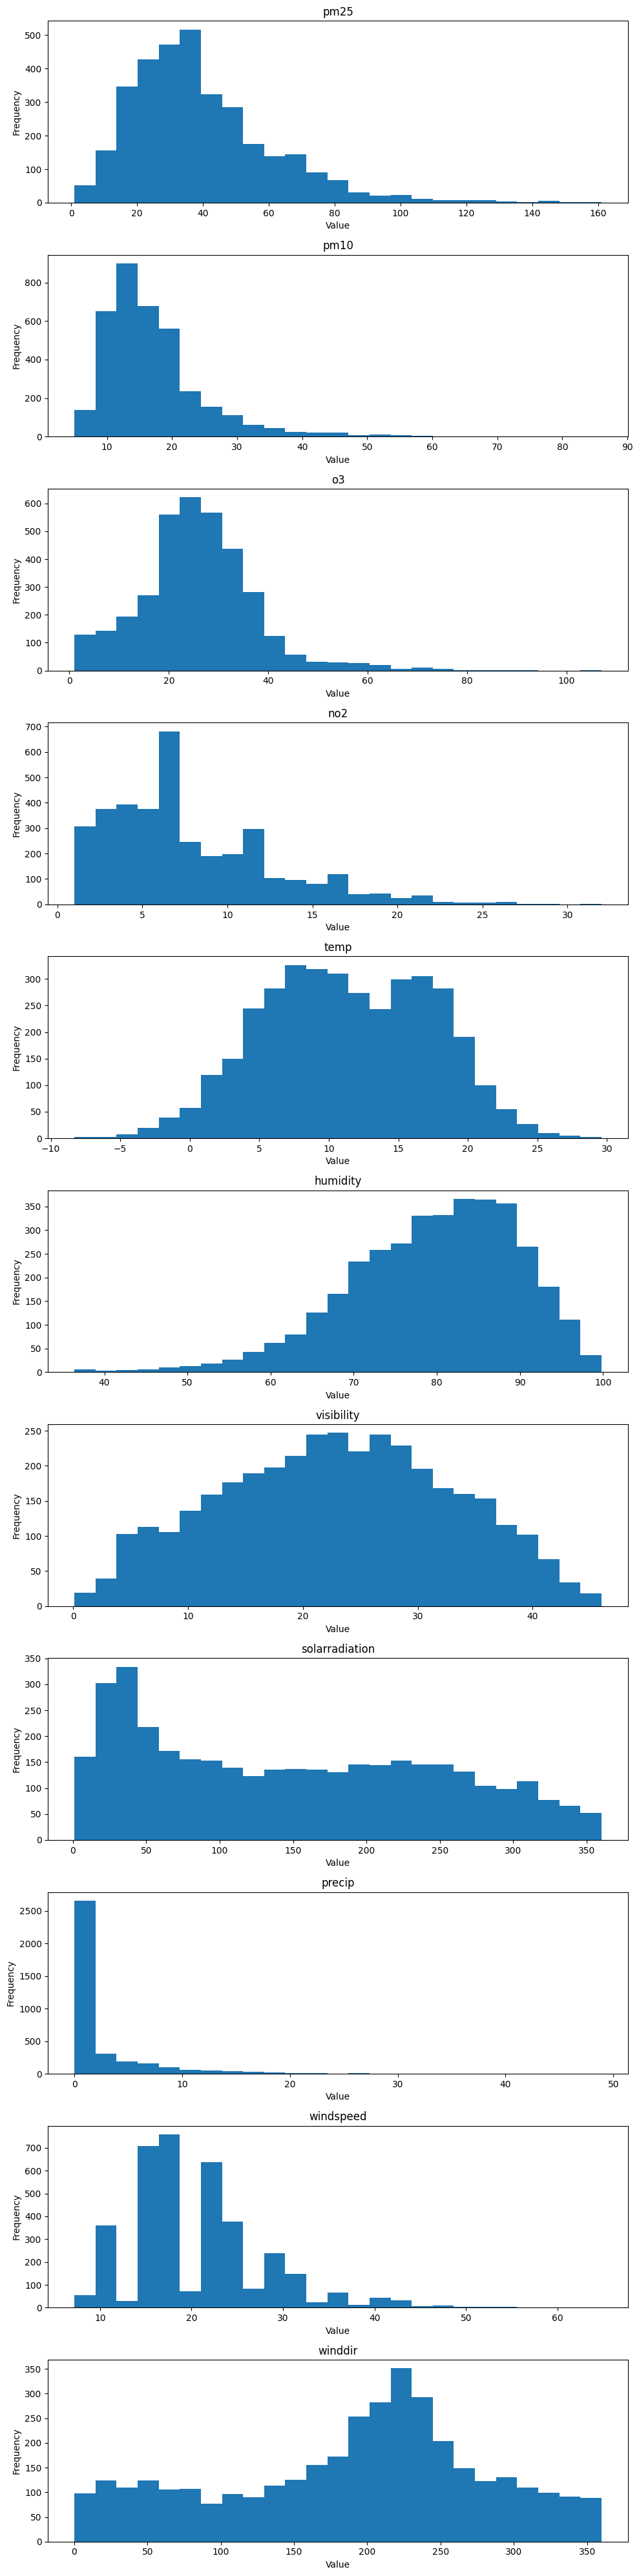

In [56]:

# Create a figure with multiple subplots
fig, axs = plt.subplots(len(all_selected_columns), figsize=(10, 40))

# Create a histogram for each variable
for i, var in enumerate(all_selected_columns):
    axs[i].hist(merged_df[var], bins=25)
    axs[i].set_title(var)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

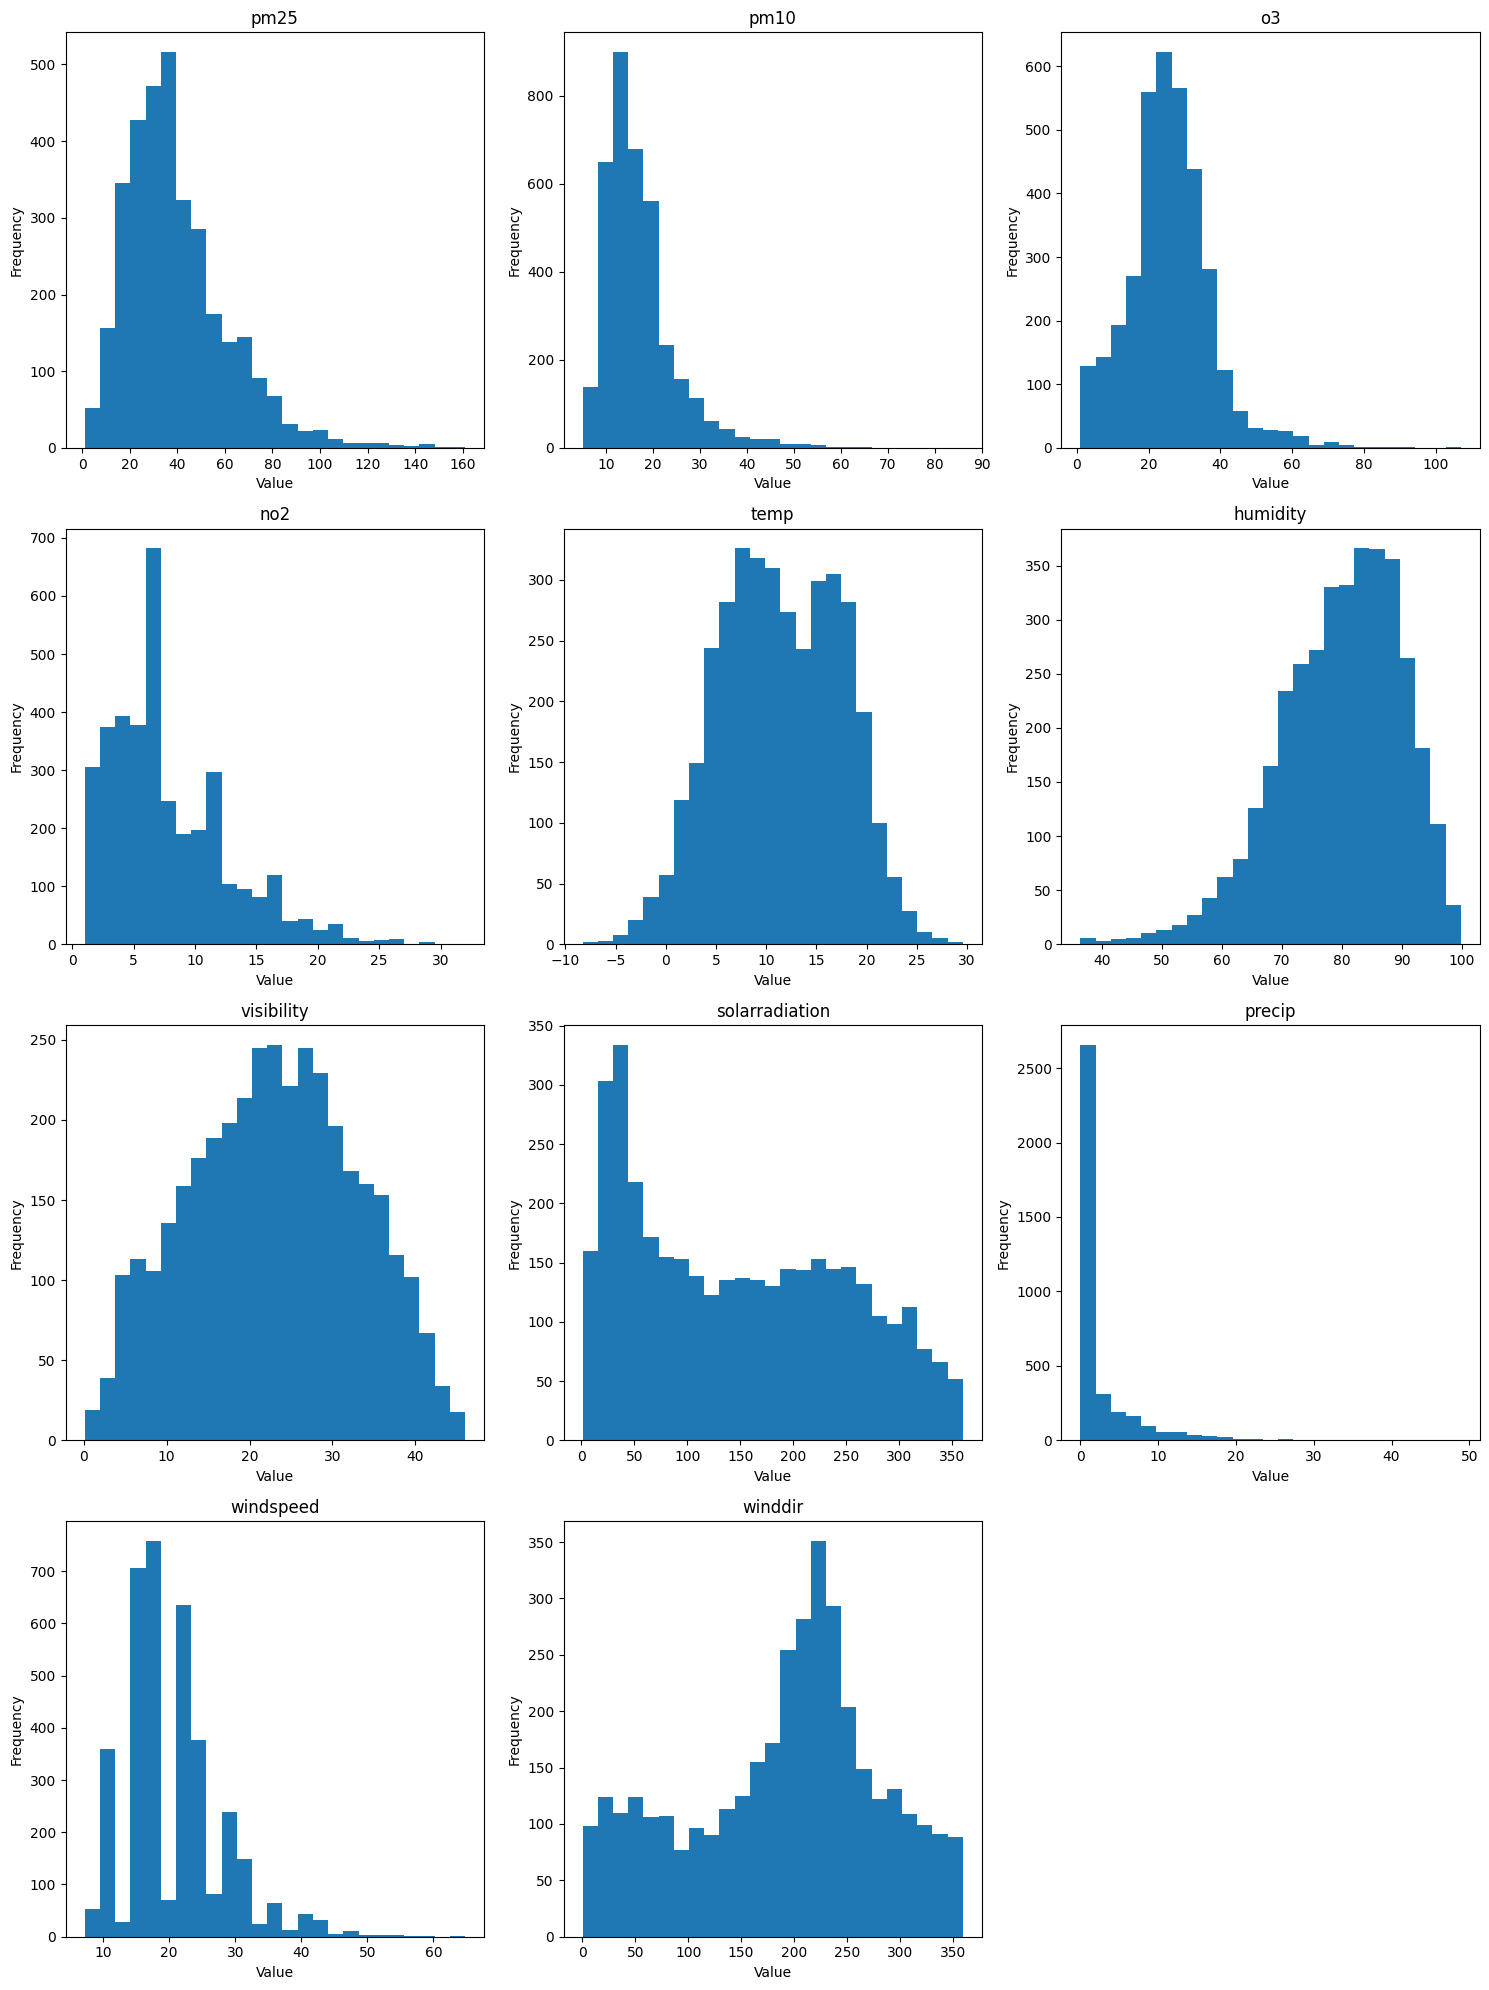

In [57]:
import math

# Determine number of rows and columns for the grid
num_columns = 3  # Set the number of subplots per row
num_rows = math.ceil(len(all_selected_columns) / num_columns)  # Calculate the number of rows needed

# Create a figure with a grid of subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))  # Adjust the size as needed

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Create a histogram for each variable
for i, var in enumerate(all_selected_columns):
    axs[i].hist(merged_df[var], bins=25)
    axs[i].set_title(var)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Remove any unused subplots if the number of variables isn't a perfect fit for the grid
for i in range(len(all_selected_columns), len(axs)):
    fig.delaxes(axs[i])

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()


In [27]:
merged_df[all_selected_columns].isnull().any()

pm25               True
pm10               True
o3                 True
no2                True
temp              False
humidity          False
visibility         True
solarradiation    False
precip            False
windspeed         False
winddir           False
dtype: bool

In [28]:
merged_df[['date'] + selected_columns]

,date,pm25,pm10,o3,no2,temp,humidity,visibility,solarradiation
0,11/09/2024,24.0,6.0,16.0,5.0,11.8,83.2,14.7,203.2
1,10/09/2024,26.0,16.0,27.0,3.0,14.7,83.1,20.4,78.8
2,09/09/2024,15.0,14.0,25.0,3.0,16.4,82.1,21.5,186.1
3,08/09/2024,17.0,12.0,31.0,9.0,19.5,76.1,37.4,203.7
4,07/09/2024,25.0,13.0,34.0,3.0,21.0,81.9,23.3,191.1
...,...,...,...,...,...,...,...,...,...
3665,02/02/2014,NaN,17.0,11.0,17.0,5.3,79.7,23.3,72.1
3666,01/02/2014,NaN,22.0,18.0,8.0,6.6,82.6,24.4,16.2
3667,31/01/2014,NaN,48.0,22.0,6.0,2.6,84.0,9.1,74.9
3668,30/01/2014,NaN,38.0,17.0,21.0,0.6,83.6,6.8,72.3


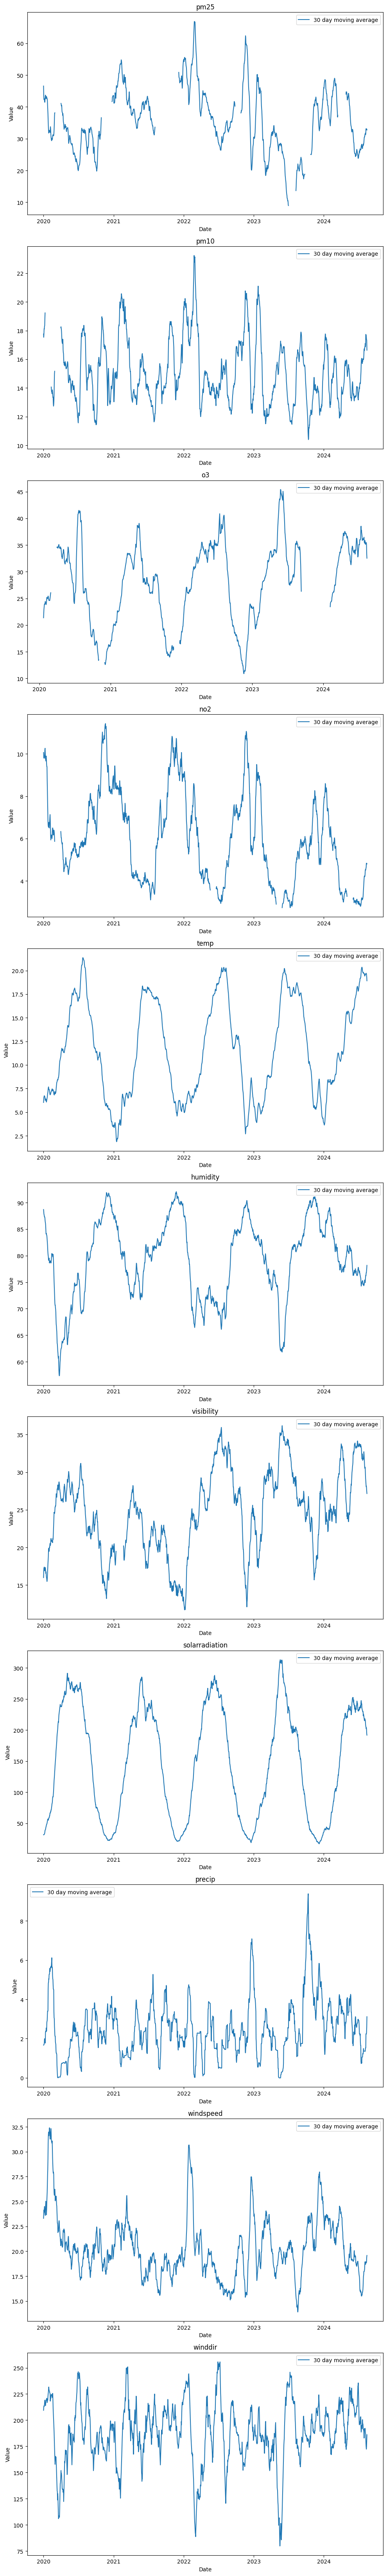

In [29]:
date = merged_df["date"]
date = pd.to_datetime(date, format="%d/%m/%Y")

# Plot each column in all_selected_columns on a separate plot
fig, axs = plt.subplots(len(all_selected_columns), figsize=(10, 6*len(all_selected_columns)))

window_size = 30  # number of days to average over

for i, column in enumerate(all_selected_columns):
    mask = (date >= '2020-01-01') & (date <= '2024-12-31')
    #axs[i].plot(date, merged_df[column], label='Original')
    axs[i].plot(date[mask], merged_df[column][mask].rolling(window_size).mean(), label=f'{window_size} day moving average')
    axs[i].set_title(column)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()

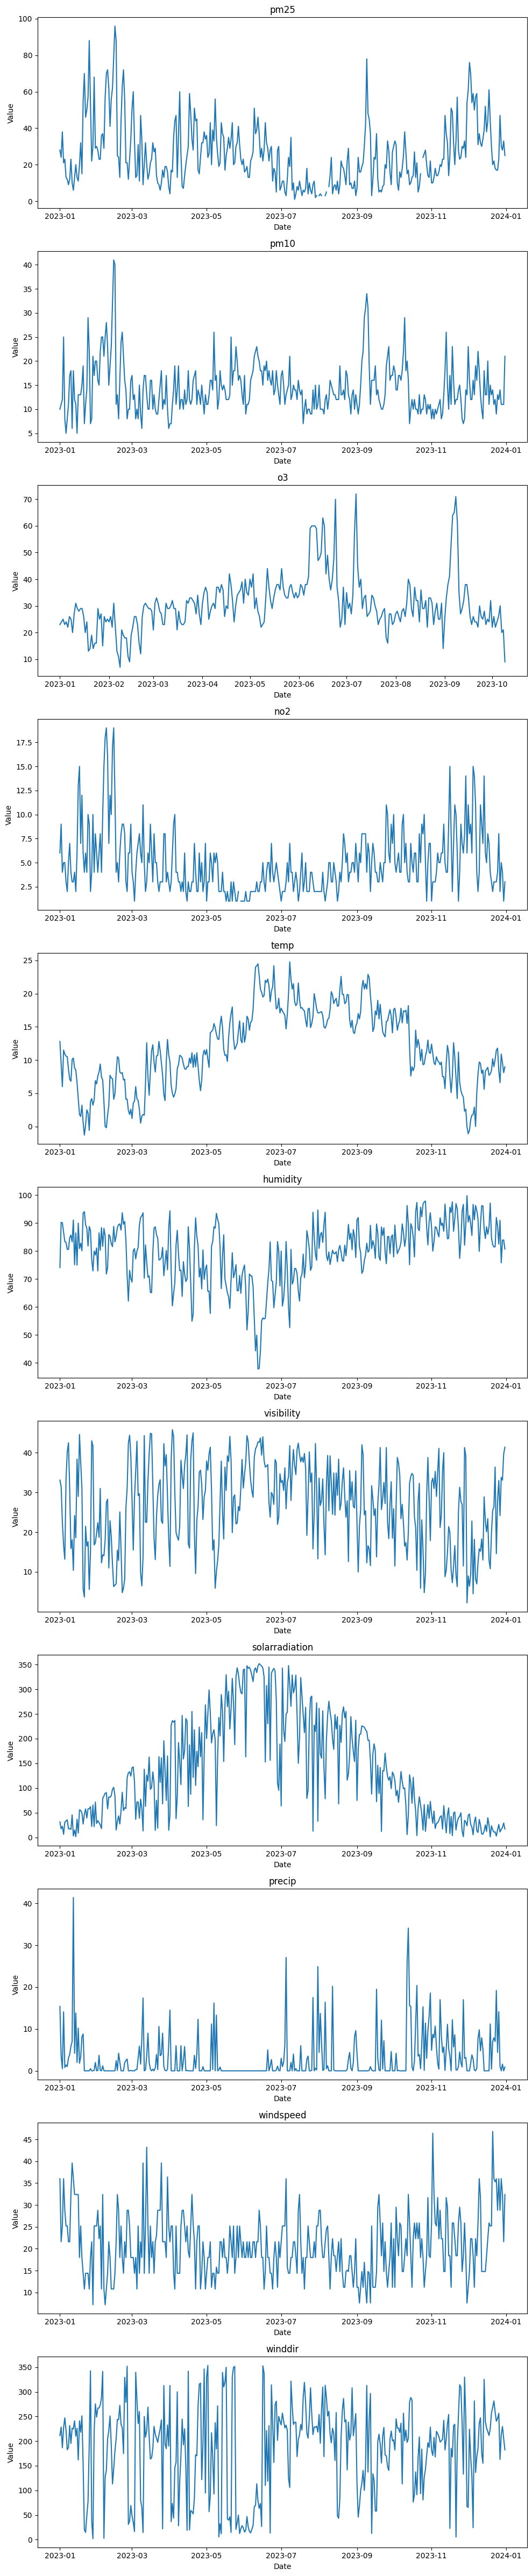

In [30]:
date = merged_df["date"]
date = pd.to_datetime(date, format="%d/%m/%Y")

# Plot each column in selected_columns on a separate plot
fig, axs = plt.subplots(len(all_selected_columns), figsize=(10, 6*len(selected_columns)))

for i, column in enumerate(all_selected_columns):
    mask = (date >= '2023-01-01') & (date <= '2023-12-31')
    axs[i].plot(date[mask], merged_df[column][mask])
    axs[i].set_title(column)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [31]:
merged_df[all_selected_columns].isnull().sum()

pm25              353
pm10               29
o3                152
no2                26
temp                0
humidity            0
visibility         17
solarradiation      0
precip              0
windspeed           0
winddir             0
dtype: int64

In [32]:
df_processed_no_missing_predictors = merged_df[['date'] + all_selected_columns].dropna(subset=['o3','no2'])
df_processed_no_missing_predictors.head()


,date,pm25,pm10,o3,no2,temp,humidity,visibility,solarradiation,precip,windspeed,winddir
0,11/09/2024,24.0,6.0,16.0,5.0,11.8,83.2,14.7,203.2,15.9,23.0,265.1
1,10/09/2024,26.0,16.0,27.0,3.0,14.7,83.1,20.4,78.8,8.2,28.4,227.0
2,09/09/2024,15.0,14.0,25.0,3.0,16.4,82.1,21.5,186.1,2.4,22.3,308.3
3,08/09/2024,17.0,12.0,31.0,9.0,19.5,76.1,37.4,203.7,0.8,22.3,179.0
4,07/09/2024,25.0,13.0,34.0,3.0,21.0,81.9,23.3,191.1,0.0,14.8,129.0


In [33]:
print(df_processed_no_missing_predictors.isnull().sum())
print(len(merged_df) - len(df_processed_no_missing_predictors))

date                0
pm25              344
pm10               20
o3                  0
no2                 0
temp                0
humidity            0
visibility         17
solarradiation      0
precip              0
windspeed           0
winddir             0
dtype: int64
161


In [34]:
df_processed_no_missing_predictors.head()

,date,pm25,pm10,o3,no2,temp,humidity,visibility,solarradiation,precip,windspeed,winddir
0,11/09/2024,24.0,6.0,16.0,5.0,11.8,83.2,14.7,203.2,15.9,23.0,265.1
1,10/09/2024,26.0,16.0,27.0,3.0,14.7,83.1,20.4,78.8,8.2,28.4,227.0
2,09/09/2024,15.0,14.0,25.0,3.0,16.4,82.1,21.5,186.1,2.4,22.3,308.3
3,08/09/2024,17.0,12.0,31.0,9.0,19.5,76.1,37.4,203.7,0.8,22.3,179.0
4,07/09/2024,25.0,13.0,34.0,3.0,21.0,81.9,23.3,191.1,0.0,14.8,129.0


In [35]:
df_processed_no_missing_predictors.set_index('date', inplace=True)

In [36]:
all_cols = df_processed_no_missing_predictors.columns

In [37]:
for t in range(1,4):
    for col in all_cols:
        df_processed_no_missing_predictors[[f'{col} - day {t}']] = df_processed_no_missing_predictors[[col]].shift(-t)

for t in range(1,3):
    for col in ['o3', 'no2']:
        df_processed_no_missing_predictors[[f'{col} + day {t}']] = df_processed_no_missing_predictors[[col]].shift(t)

df_processed_no_missing_predictors[df_processed_no_missing_predictors.columns] = df_processed_no_missing_predictors[df_processed_no_missing_predictors.columns].apply(pd.to_numeric)

In [38]:
df_processed_no_missing_predictors.drop(['pm25','pm10','temp','humidity','visibility','solarradiation','precip','windspeed','winddir'], axis=1, inplace=True)
df_processed_no_missing_predictors.drop(index=['29/01/2014','30/01/2014','31/01/2014', '10/09/2024', '11/09/2024'], inplace=True)


In [39]:
df_processed_no_missing_predictors

,o3,no2,pm25 - day 1,pm10 - day 1,o3 - day 1,no2 - day 1,temp - day 1,humidity - day 1,visibility - day 1,solarradiation - day 1,...,humidity - day 3,visibility - day 3,solarradiation - day 3,precip - day 3,windspeed - day 3,winddir - day 3,o3 + day 1,no2 + day 1,o3 + day 2,no2 + day 2
date,,,,,,,,,,,,,,,,,,,,,
09/09/2024,25.0,3.0,17.0,12.0,31.0,9.0,19.5,76.1,37.4,203.7,...,66.8,26.4,201.3,24.1,18.4,94.2,27.0,3.0,16.0,5.0
08/09/2024,31.0,9.0,25.0,13.0,34.0,3.0,21.0,81.9,23.3,191.1,...,79.3,20.3,167.8,0.0,22.3,49.4,25.0,3.0,27.0,3.0
07/09/2024,34.0,3.0,60.0,15.0,39.0,5.0,22.2,66.8,26.4,201.3,...,92.1,10.5,106.7,1.5,11.2,163.8,31.0,9.0,25.0,3.0
06/09/2024,39.0,5.0,45.0,37.0,43.0,4.0,21.4,79.3,20.3,167.8,...,89.5,10.4,97.3,4.5,18.0,205.2,34.0,3.0,31.0,9.0
05/09/2024,43.0,4.0,24.0,23.0,46.0,3.0,18.3,92.1,10.5,106.7,...,76.7,27.2,222.2,0.0,11.2,217.0,39.0,5.0,34.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05/02/2014,24.0,7.0,NaN,20.0,23.0,8.0,5.9,77.3,27.2,73.4,...,79.7,23.3,72.1,0.0,21.6,192.4,17.0,9.0,24.0,6.0
04/02/2014,23.0,8.0,NaN,22.0,8.0,11.0,3.8,83.0,17.0,81.5,...,82.6,24.4,16.2,8.1,28.8,185.8,24.0,7.0,17.0,9.0
03/02/2014,8.0,11.0,NaN,17.0,11.0,17.0,5.3,79.7,23.3,72.1,...,84.0,9.1,74.9,0.0,21.6,153.1,23.0,8.0,24.0,7.0


In [40]:
df_processed_no_missing_predictors.to_csv('../data/processed/v3_lagged_no_missing_predicted_data.csv')

In [41]:
df_processed_no_missing_predictors.head()

,o3,no2,pm25 - day 1,pm10 - day 1,o3 - day 1,no2 - day 1,temp - day 1,humidity - day 1,visibility - day 1,solarradiation - day 1,...,humidity - day 3,visibility - day 3,solarradiation - day 3,precip - day 3,windspeed - day 3,winddir - day 3,o3 + day 1,no2 + day 1,o3 + day 2,no2 + day 2
date,,,,,,,,,,,,,,,,,,,,,
09/09/2024,25.0,3.0,17.0,12.0,31.0,9.0,19.5,76.1,37.4,203.7,...,66.8,26.4,201.3,24.1,18.4,94.2,27.0,3.0,16.0,5.0
08/09/2024,31.0,9.0,25.0,13.0,34.0,3.0,21.0,81.9,23.3,191.1,...,79.3,20.3,167.8,0.0,22.3,49.4,25.0,3.0,27.0,3.0
07/09/2024,34.0,3.0,60.0,15.0,39.0,5.0,22.2,66.8,26.4,201.3,...,92.1,10.5,106.7,1.5,11.2,163.8,31.0,9.0,25.0,3.0
06/09/2024,39.0,5.0,45.0,37.0,43.0,4.0,21.4,79.3,20.3,167.8,...,89.5,10.4,97.3,4.5,18.0,205.2,34.0,3.0,31.0,9.0
05/09/2024,43.0,4.0,24.0,23.0,46.0,3.0,18.3,92.1,10.5,106.7,...,76.7,27.2,222.2,0.0,11.2,217.0,39.0,5.0,34.0,3.0


In [42]:
from sklearn.model_selection import train_test_split

columns_to_predict = ['no2', 'o3', 'no2 + day 1', 'o3 + day 1', 'no2 + day 2', 'o3 + day 2']

x = df_processed_no_missing_predictors.drop(columns_to_predict, axis=1)
y = df_processed_no_missing_predictors[columns_to_predict]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [44]:
def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(x_train, y_train)
predictions = tree_regressor.predict(x_test)
mean_squared_error(y_test, predictions)

np.float64(85.95975918884665)

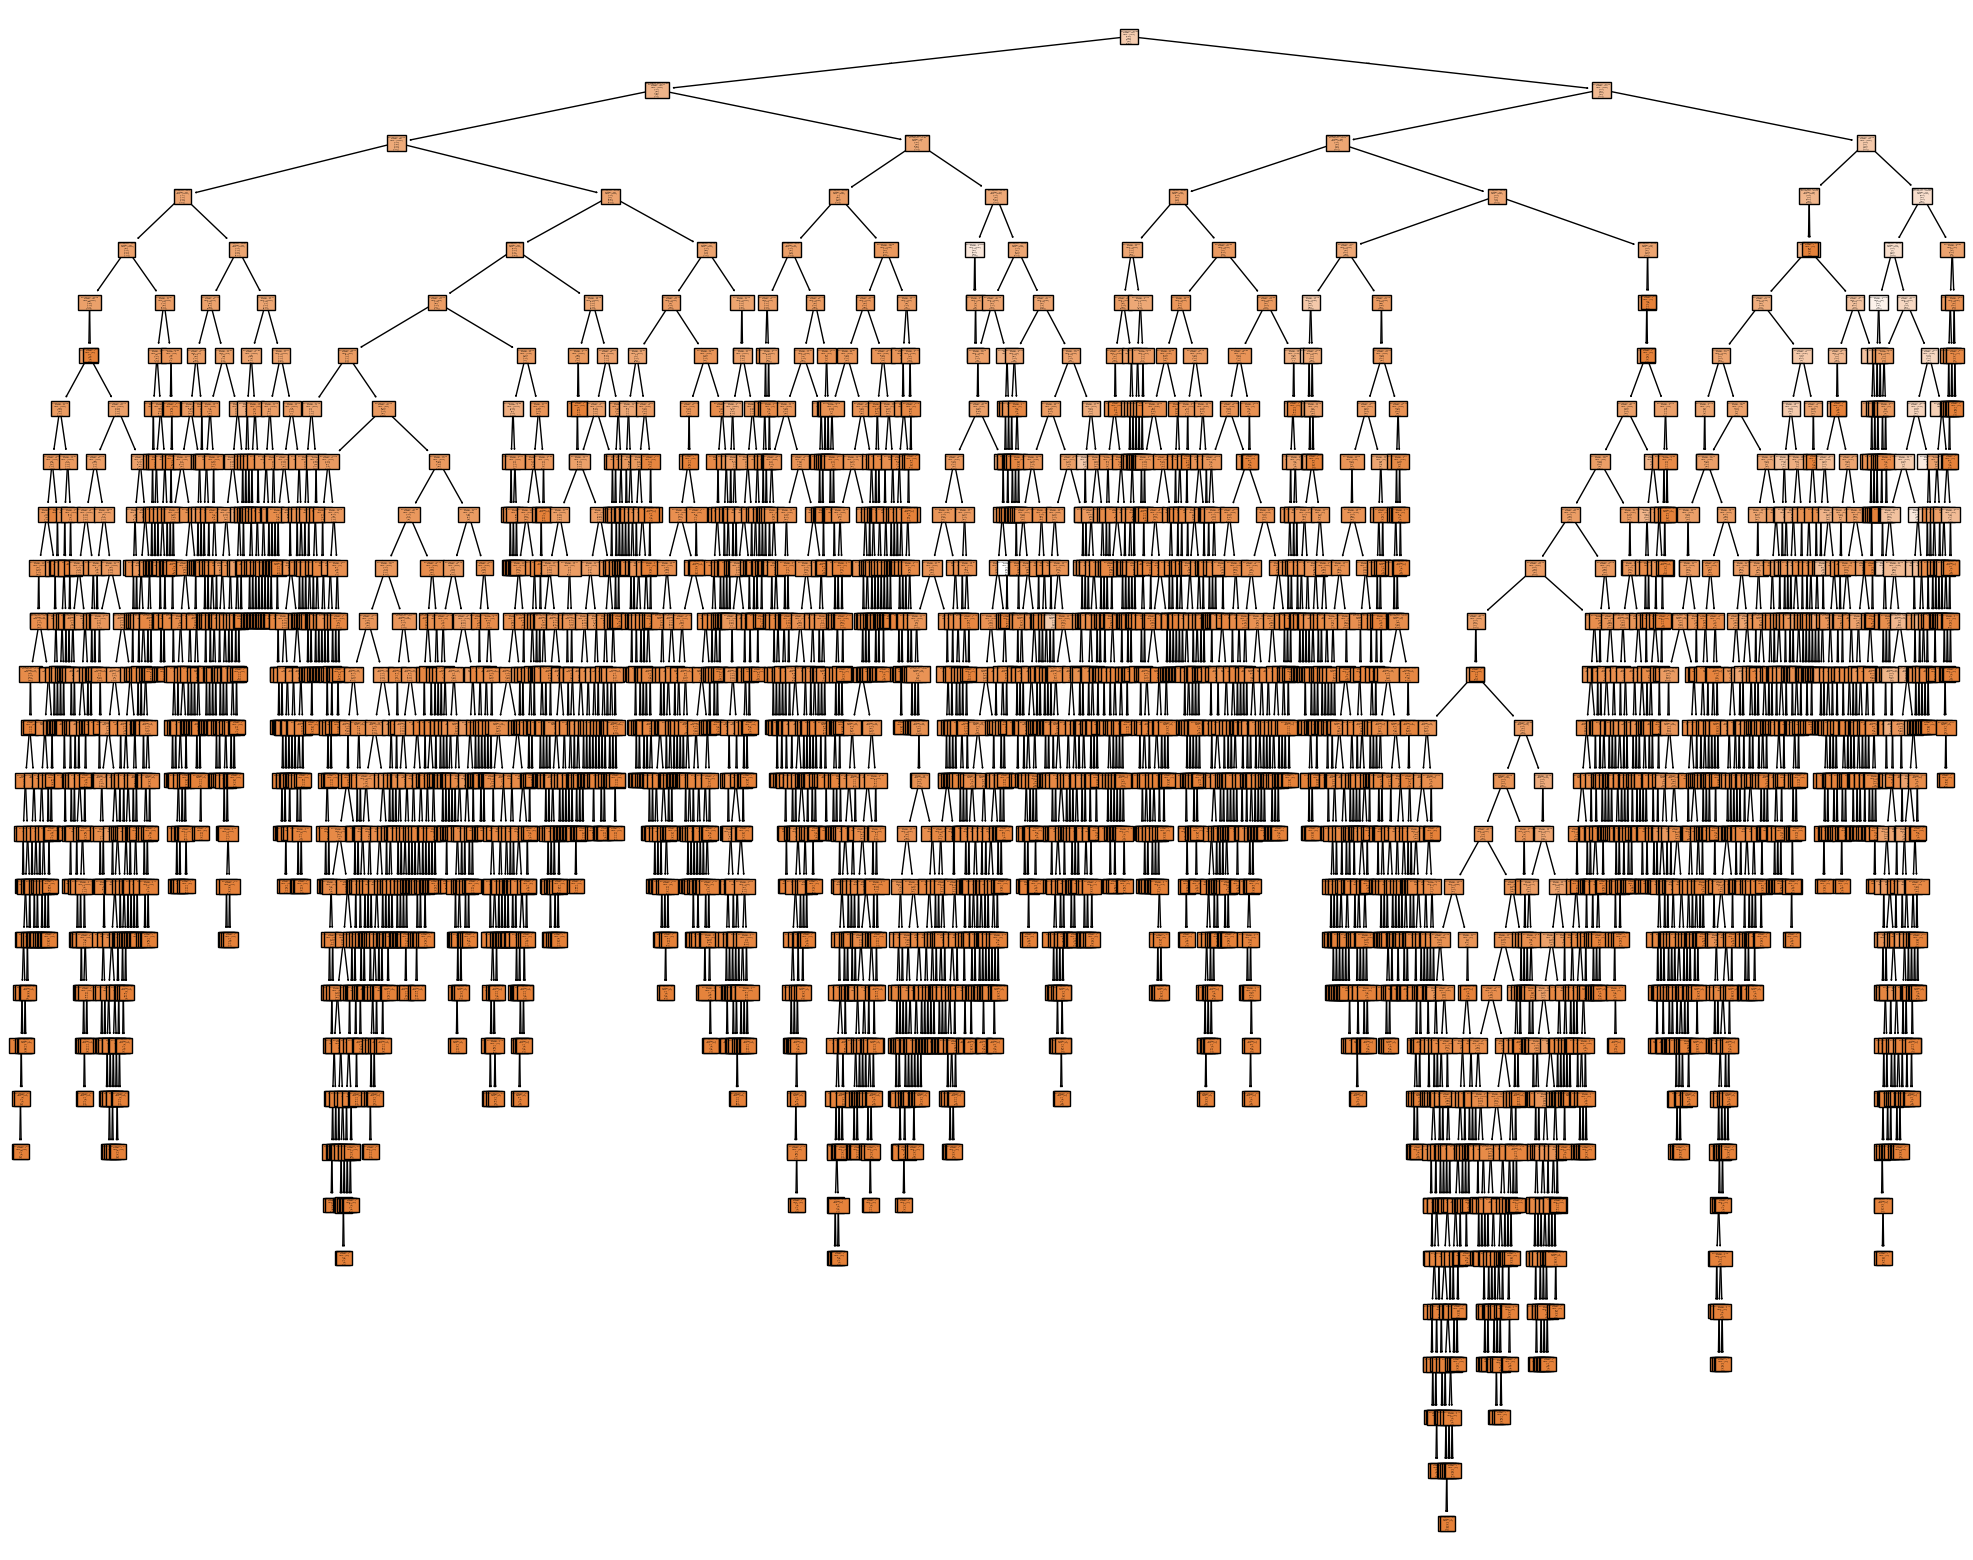

In [46]:
from sklearn.tree import plot_tree


fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree_regressor, 
                   feature_names=x.columns,  
                   class_names=columns_to_predict,
                   filled=True)

In [47]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor()
forest_regressor.fit(x_train, y_train)
predictions = forest_regressor.predict(x_test)
mean_squared_error(y_test, predictions)

np.float64(42.57723829214195)

In [48]:
import xgboost as xgb
xg_regressor = xgb.XGBRegressor()
xg_regressor.fit(x_train, y_train)

predictions = xg_regressor.predict(x_test)

mean_squared_error(y_test, predictions)

np.float64(48.28651136631683)

In [49]:
y_test

,no2,o3,no2 + day 1,o3 + day 1,no2 + day 2,o3 + day 2
date,,,,,,
29/01/2015,18.0,18.0,16.0,15.0,13.0,17.0
01/07/2023,1.0,35.0,2.0,29.0,2.0,31.0
08/05/2018,12.0,46.0,6.0,33.0,6.0,38.0
27/02/2016,6.0,27.0,12.0,25.0,32.0,1.0
07/03/2023,8.0,23.0,6.0,23.0,5.0,31.0
...,...,...,...,...,...,...
07/10/2021,9.0,16.0,8.0,20.0,7.0,18.0
21/02/2024,4.0,32.0,3.0,30.0,5.0,26.0
09/08/2019,1.0,27.0,2.0,26.0,5.0,23.0


In [50]:
pd.DataFrame(predictions, columns=columns_to_predict)

,no2,o3,no2 + day 1,o3 + day 1,no2 + day 2,o3 + day 2
0,10.969678,20.028223,11.037855,19.282787,9.368443,14.501373
1,3.859787,28.944586,3.816118,29.734661,2.731500,26.329105
2,6.203996,46.114029,4.411616,35.924404,5.660764,32.117207
3,8.807019,22.281197,14.102702,22.989748,14.308500,17.427181
4,7.320661,24.475666,3.693445,18.533527,8.857215,33.281200
...,...,...,...,...,...,...
1047,6.921497,18.299881,7.009744,17.979807,7.544902,22.953842
1048,9.677990,20.363054,11.878374,26.687351,7.022942,20.133270
1049,5.247535,21.913979,6.562646,25.398222,5.174911,26.282225
1050,3.576551,28.215385,6.040085,30.579699,2.748496,32.487507
